# Uploading dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd drive/My Drive/MS thesis/Data/keyBERTproject/

import pandas as pd
# read the csv file
df = pd.read_csv("/content/drive/My Drive/MS thesis/Data/keyBERTproject/gender_related_dataset.csv")
len(df)

Mounted at /content/drive/
/content/drive/My Drive/MS thesis/Data/keyBERTproject


4111

In [2]:
#leave only necessary columns and merge three text columns into one
df = df[['Title', 'Post_body', 'Comments', 'Label']]
df['text'] = df['Title'].fillna('') + ' ' + df['Post_body'].fillna('') + ' ' + df['Comments'].fillna('')
df = df.drop(columns=['Title', 'Post_body', 'Comments'])
df

,Label,text
0,0,"Trying to add someone I just met, and facebook..."
1,0,"No help from Facebook Support, in stream ads f..."
2,0,How do I reset my Reels recommendations on Fac...
3,0,Is there any way to find out if anyone unfrien...
4,0,How to fix this error? I've tried to send frie...
...,...,...
4106,0,22 [M4F] Looking For Friends (And More!) Hello...
4107,0,32[M4F] looking for a Friend. 32[M4F] Married ...
4108,0,24 [M4F] Lancashire Wanting to meet women in L...
4109,0,31 [F4M] Irish female looking for new friends ...


# Data preprocessing

1.   **Tokenization**: Break the text into words or phrases.
2.   **Normalization**: Convert text to lowercase, remove punctuation, noise, such as misspellings, grammatical errors, and special characters.
3.   **Stopword Removal**: Eliminate common words that do not carry significant meaning.
4.   **Vectorization**: Transform text into numerical features using techniques like Bag of Words or TF-IDF.

In [3]:
!pip install emoji --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 7.2 MB/s eta 0:00:00


In [4]:
from string import punctuation
from pathlib import Path
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
import nltk
import emoji
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
def get_penn_to_wordnet(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def get_preprocessed_text(text):
    lowercased = text.lower()
    no_punctuation = ''.join([char for char in lowercased if char not in punctuation])
    no_emojis = ''.join([char for char in no_punctuation if char not in emoji.EMOJI_DATA])
    nltk_stopwords = set(stopwords.words('english'))
    no_stopword = ' '.join([word for word in no_emojis.split() if word not in nltk_stopwords])
    tokens = word_tokenize(no_stopword)
    nltk_tags = nltk.pos_tag(tokens)
    wordnet_tags = [(word, get_penn_to_wordnet(tag)) for word, tag in nltk_tags]
    lemmatizer = WordNetLemmatizer()
    preprocessed_text = [lemmatizer.lemmatize(word, tag) if tag else word for word, tag in wordnet_tags]
    preprocessed_text = ' '.join(preprocessed_text)

    return preprocessed_text

In [6]:
test_text = "This sample text contains laughing emojis 😀 😃 😄 😁 😆 😅 😂 🤣! This is not a joke? OHHH"
clean_text = get_preprocessed_text(test_text)
print(clean_text)

sample text contain laugh emojis joke ohhh


In [7]:
sample_text = """Your filter is extremely sexiest and discriminatory,"A man in a swimsuit" is not a blocked prompt but ""a woman in a swimsuit"" is blocked"" a man having a shower"" not blocked ""a woman having a shower"" blocked.""A womans chest"" blocked ""a man's chest"" ....? I don't know I just got blocked for the next hour lol 🤣"""
prepr_text = get_preprocessed_text(sample_text)
print(prepr_text)

filter extremely sexy discriminatorya man swimsuit block prompt woman swimsuit block man shower block woman shower blockeda womans chest blocked man chest dont know get blocked next hour lol


In [8]:
#preprocess the text
df['preprocessed_text'] = df['text'].apply(get_preprocessed_text)
df.head(10)

,Label,text,preprocessed_text
0,0,"Trying to add someone I just met, and facebook...",try add someone meet facebook tried claim look...
1,0,"No help from Facebook Support, in stream ads f...",help facebook support stream ad live suffer he...
2,0,How do I reset my Reels recommendations on Fac...,reset reel recommendation facebook reset video...
3,0,Is there any way to find out if anyone unfrien...,way find anyone unfriended unfollowed don ’ t ...
4,0,How to fix this error? I've tried to send frie...,fix error ive tried send friend request people...
5,0,Fake account replying to my comments with spam...,fake account reply comment spam look like porn...
6,0,My friend’s tags on my photos are removed is t...,friend ’ s tag photo remove normal see restric...
7,1,Thousands of men in private Facebook groups th...,thousand men private facebook group ‘ cesspit ...
8,0,"Wife got hacked and lost account completely, l...",wife get hacked lose account completely like n...
9,1,Facebook's Messenger AI bot seems to scan thro...,facebooks messenger ai bot seem scan 5 year ol...


In [9]:
#drop the raw text column
df = df.drop(columns=['text'])
df = df.rename(columns={'Label': 'label'})
df = df[['preprocessed_text', 'label']]
df

,preprocessed_text,label
0,try add someone meet facebook tried claim look...,0
1,help facebook support stream ad live suffer he...,0
2,reset reel recommendation facebook reset video...,0
3,way find anyone unfriended unfollowed don ’ t ...,0
4,fix error ive tried send friend request people...,0
...,...,...
4106,22 m4f look friend hello naaaaaammmmeeeees nii...,0
4107,32m4f look friend 32m4f married asian male usa...,0
4108,24 m4f lancashire want meet woman lancashire h...,0
4109,31 f4m irish female look new friend chat hi i ...,0


#Feature extraction


*   Bag of Words (BoW)
*   Term frequency - Inverse Document Frequency (TF-IDF)



In [11]:
class Category:
  NOT_GENDER_RELATED = "NOT_GENDER_RELATED"
  GENDER_RELATED = "GENDER_RELATED"

class Posts:
  def __init__(self, text, label):
    self.text = text
    self.label = label
    self.category = self.get_category()

  def get_category(self):
    if self.label == 0:
      return Category.NOT_GENDER_RELATED
    else:
      return Category.GENDER_RELATED

In [12]:
posts = [Posts(row['preprocessed_text'], row['label']) for index, row in df.iterrows()]

In [13]:
posts[5].text

'fake account reply comment spam look like porn isnt post friend everytime comment post fake account always different username post tag image bunch emojis look like crop porn image whenever report comment facebook say theyre violation community guideline dont know someone clearly set spam account follow make reply post comment run small business facebookinstagram page hurt resolve'

In [14]:
posts[5].category

'NOT_GENDER_RELATED'

In [15]:
#Split data into train and test
from sklearn.model_selection import train_test_split
X = [post.text for post in posts]
y = [post.category for post in posts]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [16]:
# summarize class distribution
from collections import Counter
counter = Counter(y)
print(counter)

Counter({'NOT_GENDER_RELATED': 3992, 'GENDER_RELATED': 119})


In [17]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# Fit and transform the text data
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

# transform X_test using CountVectorizer
X_test_cv = cv.transform(X_test)
X_test_cv.shape

(1357, 20747)

In [18]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import  TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
X_train_tfidf = tfidf.fit_transform(X_train)
X_train_tfidf.shape

# transform X_test using TfidfVectorizer
X_test_tfidf = tfidf.transform(X_test)
X_test_tfidf.shape

(1357, 20747)

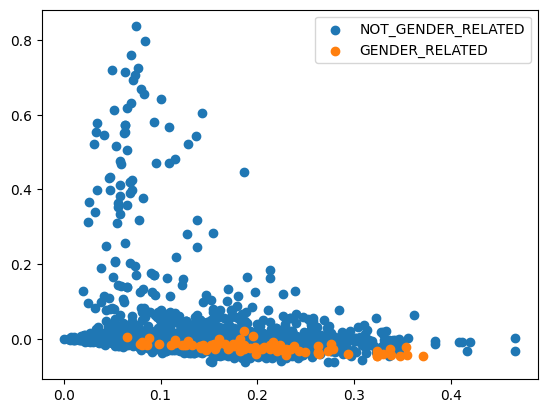

In [19]:
# scatter plot of examples by class label
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot
# define the transform
svd = TruncatedSVD(n_components=2)
# fit and transform the data
X_train_tfidf_svd = svd.fit_transform(X_train_tfidf)
# create scatter plot of transformed data
for label, _ in counter.items():
    row_ix = [i for i in range(len(y_train)) if y_train[i] == label]
    pyplot.scatter(X_train_tfidf_svd[row_ix, 0], X_train_tfidf_svd[row_ix, 1], label=str(label))
plt.legend()
plt.show()

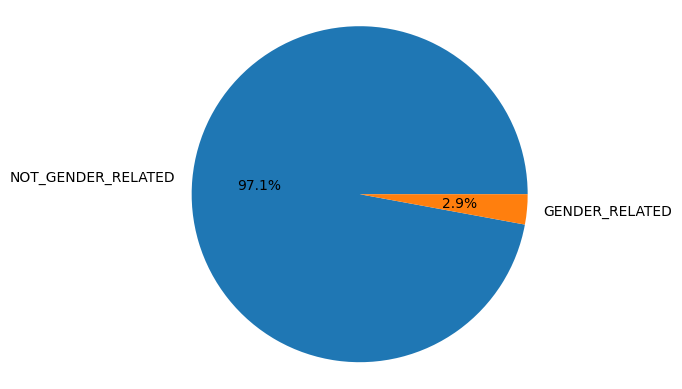

In [20]:
#piechart of class distribution
labels = counter.keys()
sizes = counter.values()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

## Oversampling the minority class

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
#SMOTE + BOW
X_resampled_cv, y_resampled_cv = smote.fit_resample(X_train_cv, y_train)

In [22]:
#SMOTE + TFIDF
X_resampled_tfidf, y_resampled_tfidf = smote.fit_resample(X_train_tfidf, y_train)

In [23]:
# summarize class distribution
from collections import Counter
counter = Counter(y_resampled_cv)
print(counter)

Counter({'NOT_GENDER_RELATED': 2674, 'GENDER_RELATED': 2674})


In [24]:
counter_tfidf = Counter(y_resampled_tfidf)
print(counter_tfidf)

Counter({'NOT_GENDER_RELATED': 2674, 'GENDER_RELATED': 2674})


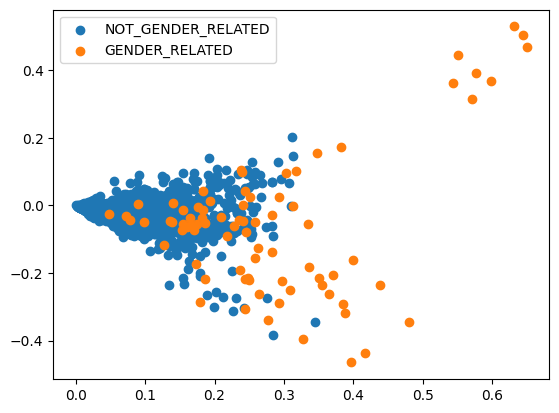

In [25]:
# scatter plot of examples by class label
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot
# define the transform
svd = TruncatedSVD(n_components=2)
# fit and transform the data
X_resampled_svd = svd.fit_transform(X_resampled_tfidf)
# create scatter plot of transformed data
for label, _ in counter.items():
    row_ix = [i for i in range(len(y_train)) if y_train[i] == label]
    pyplot.scatter(X_resampled_svd[row_ix, 0], X_resampled_svd[row_ix, 1], label=str(label))
plt.legend()
plt.show()

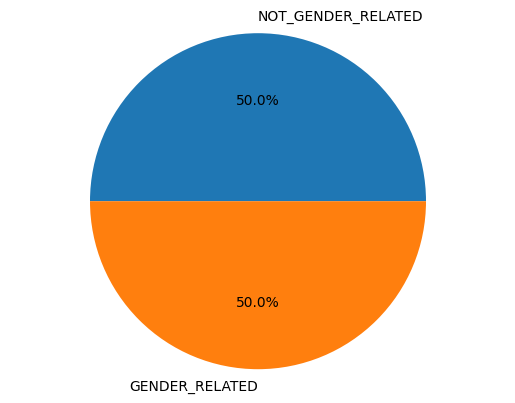

In [26]:
#piechart of class distribution
labels = counter.keys()
sizes = counter.values()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

## Traditional Machine Learning models

**Machine Learning**:
1.   Logistic Regression
2.   Naive Bayes
3.   Support Vector Machines (SVM)
4.   Random Forest, Decision Tree, XGBoost, AdaBoost?

### Linear SVM


In [27]:
#SVM_BOW
from sklearn import svm
clf_svm = svm.SVC(kernel = 'linear', probability=True)
clf_svm.fit(X_train_cv, y_train)
clf_svm.predict(X_test_cv)

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

In [28]:
#SVM_TFIDF
clf_svm_tfidf = svm.SVC(kernel = 'linear', probability=True)
clf_svm_tfidf.fit(X_train_tfidf, y_train)
clf_svm_tfidf.predict(X_test_tfidf)

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

In [29]:
#SVM_BOW on resampled data
clf_svm_resampled = svm.SVC(kernel = 'linear', probability=True)
clf_svm_resampled.fit(X_resampled_cv, y_resampled_cv)
clf_svm_resampled.predict(X_test_cv)

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

In [30]:
#SVM_TFIDF on resampled data
clf_svm_tfidf_resampled = svm.SVC(kernel = 'linear', probability=True)
clf_svm_tfidf_resampled.fit(X_resampled_tfidf, y_resampled_tfidf)
clf_svm_tfidf_resampled.predict(X_test_tfidf)

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

### Logistic Regression

In [31]:
#LR_BOW
from sklearn.linear_model import LogisticRegression
clf_logr = LogisticRegression()
clf_logr.fit(X_train_cv, y_train)
clf_logr.predict(X_test_cv)

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

In [32]:
#LR_TFIDF
clf_logr_tfidf = LogisticRegression()
clf_logr_tfidf.fit(X_train_tfidf, y_train)
clf_logr_tfidf.predict(X_test_tfidf)

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

In [33]:
#LR_BOW on resampled data
clf_logr_resampled = LogisticRegression()
clf_logr_resampled.fit(X_resampled_cv, y_resampled_cv)
clf_logr_resampled.predict(X_test_cv)

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

In [34]:
#LR_TFIDF on resampled data
clf_logr_tfidf_resampled = LogisticRegression()
clf_logr_tfidf_resampled.fit(X_resampled_tfidf, y_resampled_tfidf)
clf_logr_tfidf_resampled.predict(X_test_tfidf)

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

### Decision Tree

In [35]:
#DT_BOW
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_cv, y_train)
clf_dt.predict(X_test_cv)

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

In [36]:
#DT_TFIDF
clf_dt_tfidf = DecisionTreeClassifier()
clf_dt_tfidf.fit(X_train_tfidf, y_train)
clf_dt_tfidf.predict(X_test_tfidf)

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

In [37]:
#DT_BOW on resampled data
clf_dt_resampled = DecisionTreeClassifier()
clf_dt_resampled.fit(X_resampled_cv, y_resampled_cv)
clf_dt_resampled.predict(X_test_cv)

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

In [38]:
#DT_TFIDF on resampled data
clf_dt_tfidf_resampled = DecisionTreeClassifier()
clf_dt_tfidf_resampled.fit(X_resampled_tfidf, y_resampled_tfidf)
clf_dt_tfidf_resampled.predict(X_test_tfidf)

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

### Naive Bayes (Gaussian)

In [39]:
#NB_BOW
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_cv.toarray(), y_train)
clf_gnb.predict(X_test_cv.toarray())

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

In [40]:
#NB_TFIDF
clf_gnb_tfidf = GaussianNB()
clf_gnb_tfidf.fit(X_train_tfidf.toarray(), y_train)
clf_gnb_tfidf.predict(X_train_tfidf.toarray())

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

In [41]:
#NB_BOW on resampled data
clf_gnb_resampled = GaussianNB()
clf_gnb_resampled.fit(X_resampled_cv.toarray(), y_resampled_cv)
clf_gnb_resampled.predict(X_test_cv.toarray())

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

In [42]:
#NB_TFIDF on resampled data
clf_gnb_tfidf_resampled = GaussianNB()
clf_gnb_tfidf_resampled.fit(X_resampled_tfidf.toarray(), y_resampled_tfidf)
clf_gnb_tfidf_resampled.predict(X_test_tfidf.toarray())

array(['NOT_GENDER_RELATED', 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       ..., 'NOT_GENDER_RELATED', 'NOT_GENDER_RELATED',
       'NOT_GENDER_RELATED'], dtype='<U18')

### Evaluation

#### Classification report

##### BOW

In [49]:
# BOW + SVM
from sklearn.metrics import classification_report
print("Classification report for SVM + BOW:")
print(classification_report(y_test, clf_svm.predict(X_test_cv)))

Classification report for SVM + BOW:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.78      0.64      0.70        39
NOT_GENDER_RELATED       0.99      0.99      0.99      1318

          accuracy                           0.98      1357
         macro avg       0.89      0.82      0.85      1357
      weighted avg       0.98      0.98      0.98      1357



In [50]:
# BOW + LR
print("Classification report for LR + BOW:")
print(classification_report(y_test, clf_logr.predict(X_test_cv)))

Classification report for LR + BOW:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.88      0.56      0.69        39
NOT_GENDER_RELATED       0.99      1.00      0.99      1318

          accuracy                           0.99      1357
         macro avg       0.93      0.78      0.84      1357
      weighted avg       0.98      0.99      0.98      1357



In [51]:
# BOW + DT
print("Classification report for DT + BOW:")
print(classification_report(y_test, clf_dt.predict(X_test_cv)))

Classification report for DT + BOW:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.60      0.54      0.57        39
NOT_GENDER_RELATED       0.99      0.99      0.99      1318

          accuracy                           0.98      1357
         macro avg       0.79      0.76      0.78      1357
      weighted avg       0.98      0.98      0.98      1357



In [52]:
# BOW + NB
print("Classification report for NB + BOW:")
print(classification_report(y_test, clf_gnb.predict(X_test_cv.toarray())))

Classification report for NB + BOW:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.11      0.21      0.14        39
NOT_GENDER_RELATED       0.98      0.95      0.96      1318

          accuracy                           0.93      1357
         macro avg       0.54      0.58      0.55      1357
      weighted avg       0.95      0.93      0.94      1357



##### TFIDF

In [53]:
# TFIDF + SVM
print("Classification report for SVM + TFIDF:")
print(classification_report(y_test, clf_svm_tfidf.predict(X_test_tfidf)))

Classification report for SVM + TFIDF:
                    precision    recall  f1-score   support

    GENDER_RELATED       1.00      0.33      0.50        39
NOT_GENDER_RELATED       0.98      1.00      0.99      1318

          accuracy                           0.98      1357
         macro avg       0.99      0.67      0.75      1357
      weighted avg       0.98      0.98      0.98      1357



In [54]:
# TFIDF + LR
print("Classification report for LR + TFIDF:")
print(classification_report(y_test, clf_logr_tfidf.predict(X_test_tfidf)))

Classification report for LR + TFIDF:
                    precision    recall  f1-score   support

    GENDER_RELATED       1.00      0.03      0.05        39
NOT_GENDER_RELATED       0.97      1.00      0.99      1318

          accuracy                           0.97      1357
         macro avg       0.99      0.51      0.52      1357
      weighted avg       0.97      0.97      0.96      1357



In [55]:
# TFIDF + DT
print("Classification report for DT + TFIDF:")
print(classification_report(y_test, clf_dt_tfidf.predict(X_test_tfidf)))

Classification report for DT + TFIDF:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.49      0.51      0.50        39
NOT_GENDER_RELATED       0.99      0.98      0.98      1318

          accuracy                           0.97      1357
         macro avg       0.74      0.75      0.74      1357
      weighted avg       0.97      0.97      0.97      1357



In [56]:
# TFIDF + NB
print("Classification report for NB + TFIDF:")
print(classification_report(y_test, clf_gnb_tfidf.predict(X_test_tfidf.toarray())))

Classification report for NB + TFIDF:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.12      0.23      0.16        39
NOT_GENDER_RELATED       0.98      0.95      0.96      1318

          accuracy                           0.93      1357
         macro avg       0.55      0.59      0.56      1357
      weighted avg       0.95      0.93      0.94      1357



##### BOW + SMOTE

In [57]:
# BOW + SVM + SMOTE
print("Classification report for SVM + BOW + SMOTE:")
print(classification_report(y_test, clf_svm_resampled.predict(X_test_cv)))

Classification report for SVM + BOW + SMOTE:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.11      0.31      0.16        39
NOT_GENDER_RELATED       0.98      0.93      0.95      1318

          accuracy                           0.91      1357
         macro avg       0.54      0.62      0.56      1357
      weighted avg       0.95      0.91      0.93      1357



In [58]:
# BOW + LR + SMOTE
print("Classification report for LR + BOW + SMOTE:")
print(classification_report(y_test, clf_logr_resampled.predict(X_test_cv)))

Classification report for LR + BOW + SMOTE:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.16      0.31      0.21        39
NOT_GENDER_RELATED       0.98      0.95      0.96      1318

          accuracy                           0.93      1357
         macro avg       0.57      0.63      0.59      1357
      weighted avg       0.96      0.93      0.94      1357



In [59]:
# BOW + DT + SMOTE
print("Classification report for DT + BOW + SMOTE:")
print(classification_report(y_test, clf_dt_resampled.predict(X_test_cv.toarray())))

Classification report for DT + BOW + SMOTE:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.16      0.49      0.24        39
NOT_GENDER_RELATED       0.98      0.92      0.95      1318

          accuracy                           0.91      1357
         macro avg       0.57      0.71      0.60      1357
      weighted avg       0.96      0.91      0.93      1357



In [60]:
# BOW + NB + SMOTE
print("Classification report for SVM + BOW + SMOTE:")
print(classification_report(y_test, clf_gnb_resampled.predict(X_test_cv.toarray())))

Classification report for SVM + BOW + SMOTE:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.11      0.21      0.14        39
NOT_GENDER_RELATED       0.98      0.95      0.96      1318

          accuracy                           0.93      1357
         macro avg       0.54      0.58      0.55      1357
      weighted avg       0.95      0.93      0.94      1357



##### TFIDF + SMOTE

In [61]:
# TFIDF + SVM + SMOTE
print("Classification report for TFIDF + SVM + SMOTE:")
print(classification_report(y_test, clf_svm_tfidf_resampled.predict(X_test_tfidf)))

Classification report for TFIDF + SVM + SMOTE:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.91      0.54      0.68        39
NOT_GENDER_RELATED       0.99      1.00      0.99      1318

          accuracy                           0.99      1357
         macro avg       0.95      0.77      0.83      1357
      weighted avg       0.98      0.99      0.98      1357



In [62]:
# TFIDF + LR + SMOTE
print("Classification report for TFIDF + LR + SMOTE:")
print(classification_report(y_test, clf_logr_tfidf_resampled.predict(X_test_tfidf)))

Classification report for TFIDF + LR + SMOTE:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.60      0.64      0.62        39
NOT_GENDER_RELATED       0.99      0.99      0.99      1318

          accuracy                           0.98      1357
         macro avg       0.79      0.81      0.80      1357
      weighted avg       0.98      0.98      0.98      1357



In [63]:
# TFIDF + DT + SMOTE
print("Classification report for TFIDF + DT + SMOTE")
print(classification_report(y_test, clf_dt_tfidf_resampled.predict(X_test_tfidf)))

Classification report for TFIDF + DT + SMOTE
                    precision    recall  f1-score   support

    GENDER_RELATED       0.31      0.49      0.38        39
NOT_GENDER_RELATED       0.98      0.97      0.98      1318

          accuracy                           0.95      1357
         macro avg       0.65      0.73      0.68      1357
      weighted avg       0.97      0.95      0.96      1357



In [64]:
# TFIDF + NB + SMOTE
print("Classification report for TFIDF + NB + SMOTE:")
print(classification_report(y_test, clf_gnb_tfidf_resampled.predict(X_test_tfidf.toarray())))

Classification report for TFIDF + NB + SMOTE:
                    precision    recall  f1-score   support

    GENDER_RELATED       0.13      0.23      0.17        39
NOT_GENDER_RELATED       0.98      0.95      0.97      1318

          accuracy                           0.93      1357
         macro avg       0.55      0.59      0.57      1357
      weighted avg       0.95      0.93      0.94      1357



#### Confusion matrix

##### Confusion matrices for SVM

Confusion matrix for SVM + BOW


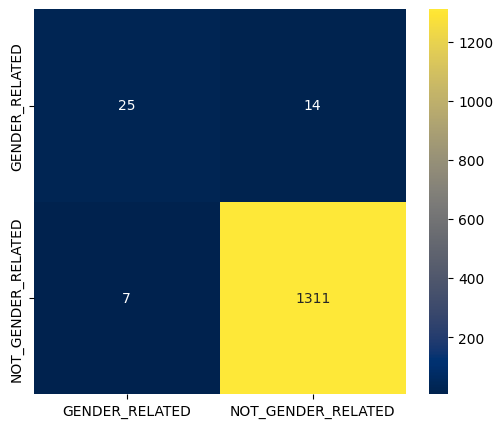

In [122]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, clf_svm.predict(X_test_cv))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
print('Confusion matrix for SVM + BOW')
plt.show()

Confusion matrix for SVM + TFIDF


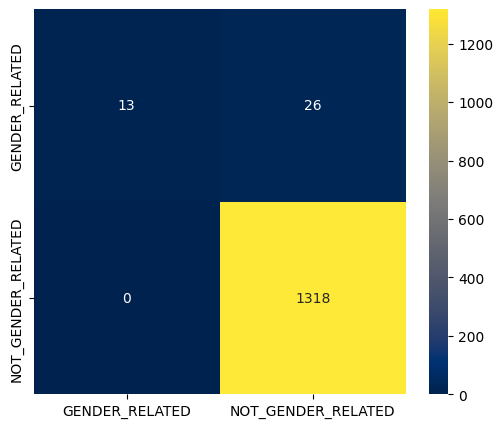

In [123]:
cm = confusion_matrix(y_test, clf_svm_tfidf.predict(X_test_tfidf))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
print('Confusion matrix for SVM + TFIDF')
plt.show()

Confusion matrix for SVM + BOW + SMOTE


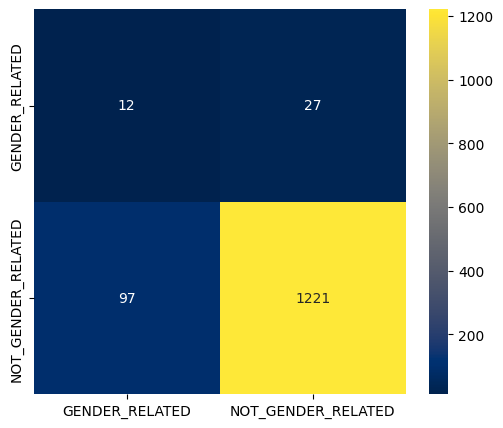

In [125]:
cm = confusion_matrix(y_test, clf_svm_resampled.predict(X_test_cv))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
print('Confusion matrix for SVM + BOW + SMOTE')
plt.show()

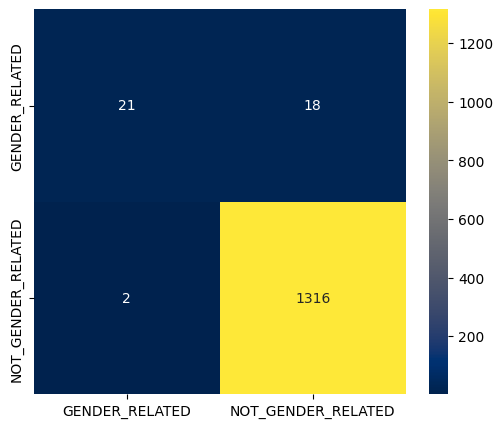

Confusion matrix for SVM + TFIDF + SMOTE


In [126]:
cm = confusion_matrix(y_test, clf_svm_tfidf_resampled.predict(X_test_tfidf))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
plt.show()
print('Confusion matrix for SVM + TFIDF + SMOTE')

##### Confusion matrices for LR

Confusion matrix for LR + BOW


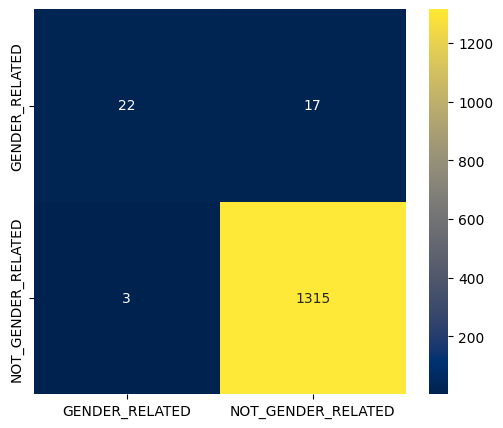

In [127]:
cm = confusion_matrix(y_test, clf_logr.predict(X_test_cv))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
print('Confusion matrix for LR + BOW')
plt.show()

Confusion matrix for LR + TFIDF


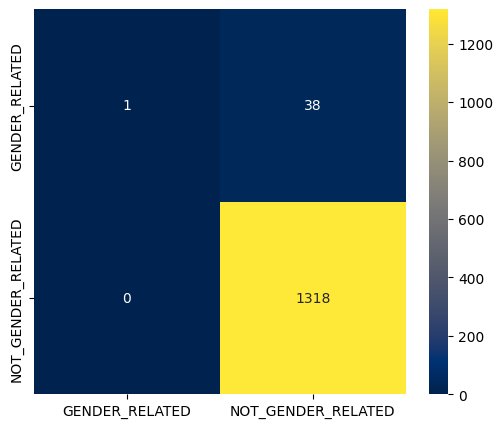

In [128]:
cm = confusion_matrix(y_test, clf_logr_tfidf.predict(X_test_tfidf))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
print('Confusion matrix for LR + TFIDF')
plt.show()

Confusion matrix for LR + BOW + SMOTE


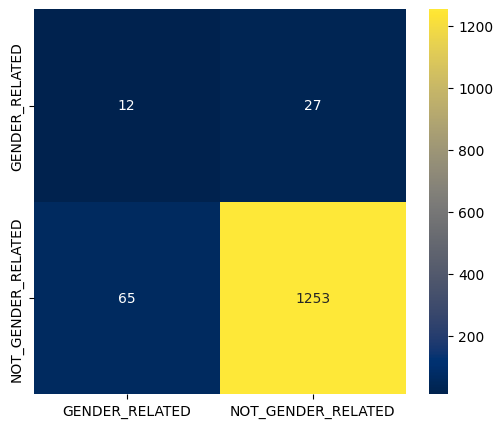

In [129]:
cm = confusion_matrix(y_test, clf_logr_resampled.predict(X_test_cv))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
print('Confusion matrix for LR + BOW + SMOTE')
plt.show()

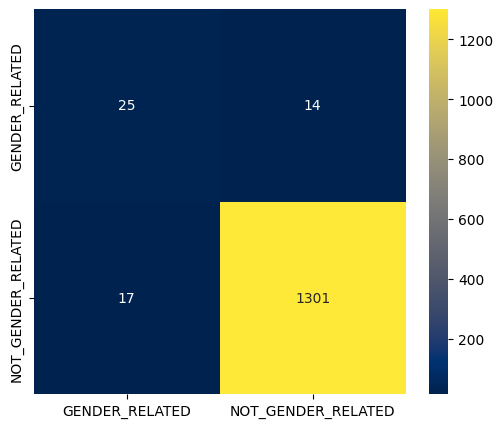

Confusion matrix for LR + TFIDF + SMOTE


In [130]:
cm = confusion_matrix(y_test, clf_logr_tfidf_resampled.predict(X_test_tfidf))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
plt.show()
print('Confusion matrix for LR + TFIDF + SMOTE')

##### Confusion matrices for DT

Confusion matrix for DT + BOW


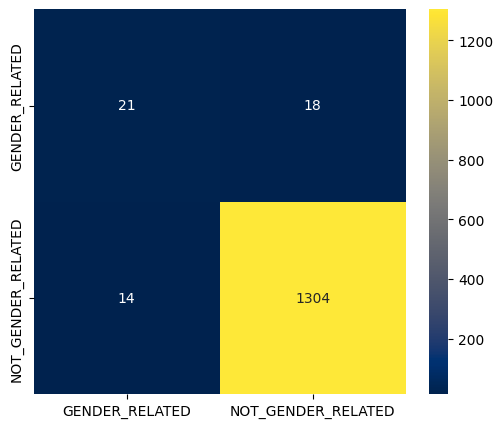

In [131]:
cm = confusion_matrix(y_test, clf_dt.predict(X_test_cv))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
print('Confusion matrix for DT + BOW')
plt.show()

Confusion matrix for DT + TFIDF


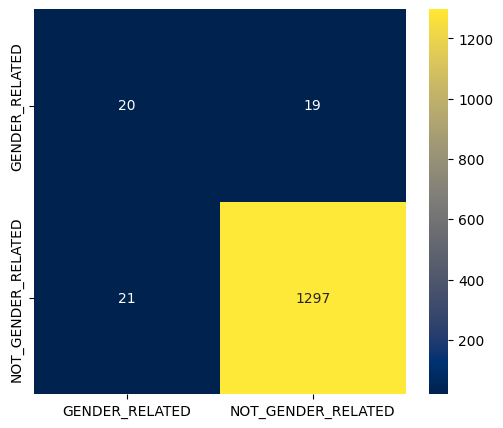

In [132]:
cm = confusion_matrix(y_test, clf_dt_tfidf.predict(X_test_tfidf))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
print('Confusion matrix for DT + TFIDF')
plt.show()

Confusion matrix for DT + BOW + SMOTE


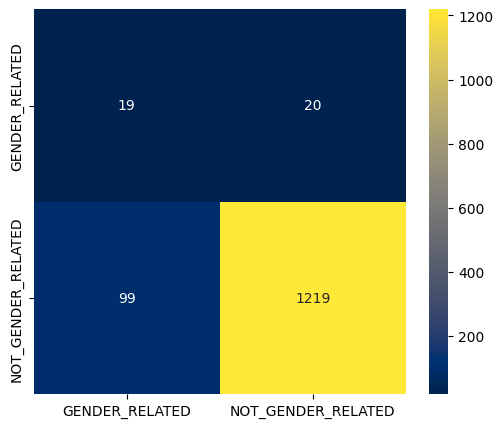

In [133]:
cm = confusion_matrix(y_test, clf_dt_resampled.predict(X_test_cv))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
print('Confusion matrix for DT + BOW + SMOTE')
plt.show()

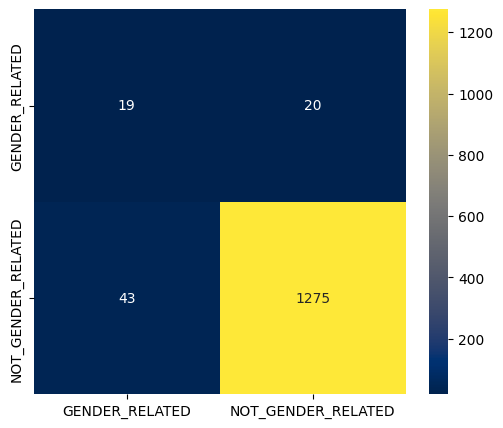

Confusion matrix for DT + TFIDF + SMOTE


In [134]:
cm = confusion_matrix(y_test, clf_dt_tfidf_resampled.predict(X_test_tfidf))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
plt.show()
print('Confusion matrix for DT + TFIDF + SMOTE')

##### Confusion matrices for NB

Confusion matrix for NB + BOW


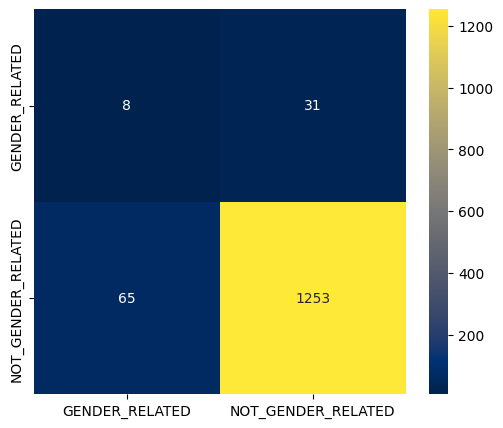

In [136]:
cm = confusion_matrix(y_test, clf_gnb.predict(X_test_cv.toarray()))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
print('Confusion matrix for NB + BOW')
plt.show()

Confusion matrix for NB + TFIDF


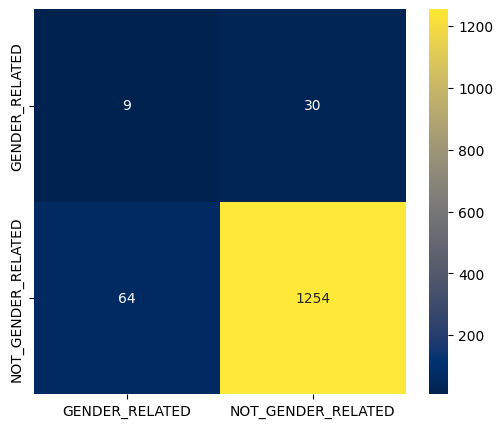

In [137]:
cm = confusion_matrix(y_test, clf_gnb_tfidf.predict(X_test_tfidf.toarray()))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
print('Confusion matrix for NB + TFIDF')
plt.show()

Confusion matrix for NB + BOW + SMOTE


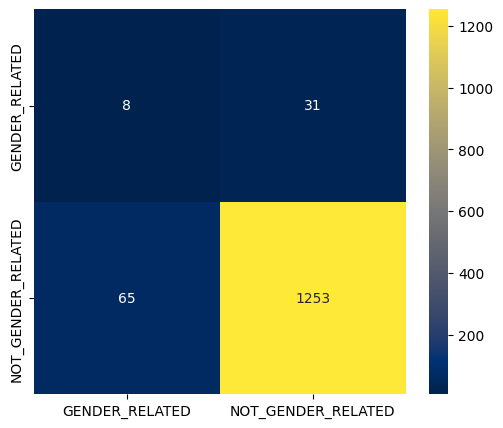

In [138]:
cm = confusion_matrix(y_test, clf_gnb_resampled.predict(X_test_cv.toarray()))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
print('Confusion matrix for NB + BOW + SMOTE')
plt.show()

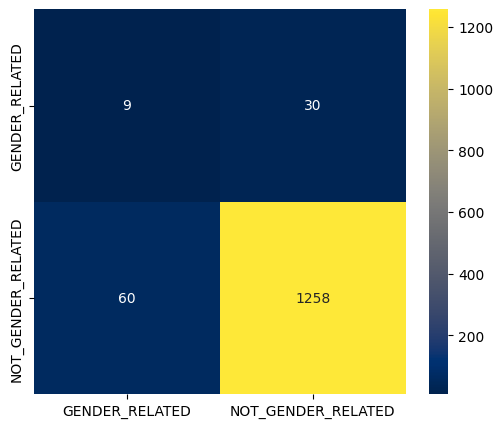

Confusion matrix for NB + TFIDF + SMOTE


In [139]:
cm = confusion_matrix(y_test, clf_gnb_tfidf_resampled.predict(X_test_tfidf.toarray()))
df_cm = pd.DataFrame(cm, index = [i for i in [Category.GENDER_RELATED , Category.NOT_GENDER_RELATED]],
                    columns = [i for i in [Category.GENDER_RELATED, Category.NOT_GENDER_RELATED]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='cividis')
plt.show()
print('Confusion matrix for NB + TFIDF + SMOTE')

#### ROC_AUC

##### ROC_AUC for SVM

AUC for SVM + BOW: 0.913660947044862


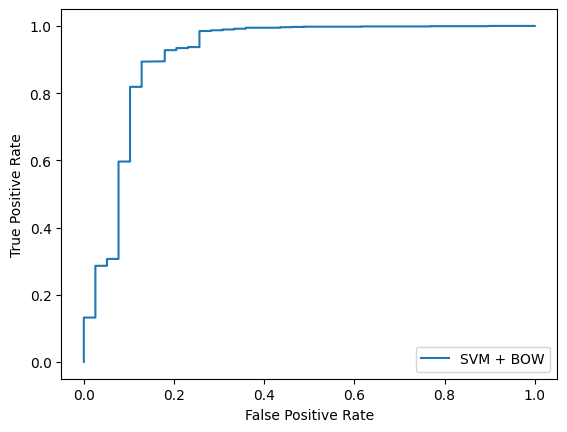

In [93]:
from sklearn.metrics import roc_auc_score
# AUC for SVM + BOW
y_pred = clf_svm.predict_proba(X_test_cv)[:, 1]
auc_svm_bow = roc_auc_score(y_test, y_pred)
print("AUC for SVM + BOW:", auc_svm_bow)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='SVM + BOW')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC for SVM + TFIDF: 0.953173028286837


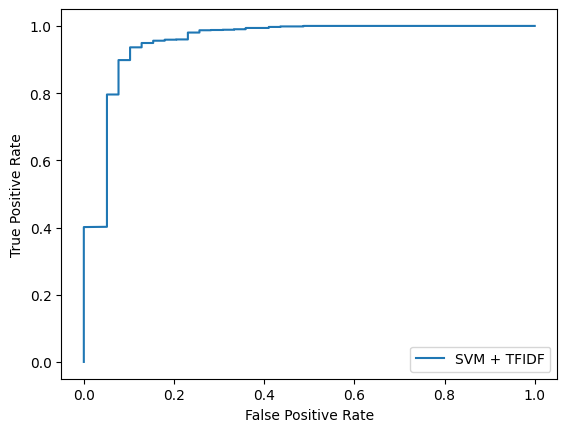

In [92]:
#AUC for SVM + TFIDF
y_pred = clf_svm_tfidf.predict_proba(X_test_tfidf)[:, 1]
auc_svm_tfidf = roc_auc_score(y_test, y_pred)
print("AUC for SVM + TFIDF:", auc_svm_tfidf)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='SVM + TFIDF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC for SVM + BOW + SMOTE: 0.5523812303023229


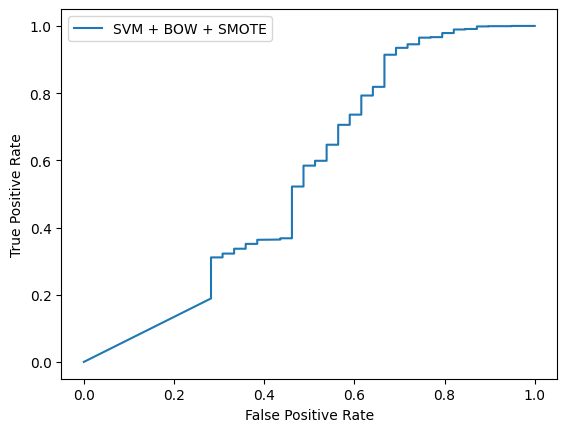

In [94]:
# AUC for SVM + BOW + SMOTE
y_pred = clf_svm_resampled.predict_proba(X_test_cv)[:, 1]
auc_svm_bow_smote = roc_auc_score(y_test, y_pred)
print("AUC for SVM + BOW + SMOTE:", auc_svm_bow_smote)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='SVM + BOW + SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC for SVM + TFIDF + SMOTE: 0.9500019454495934


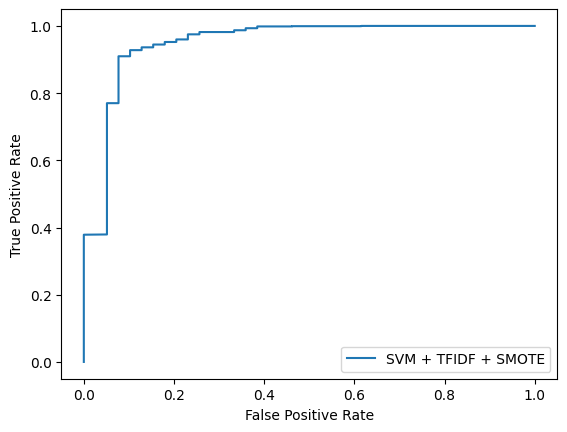

In [95]:
#AUC for SVM + TFIDF + SMOTE
y_pred = clf_svm_tfidf_resampled.predict_proba(X_test_tfidf)[:, 1]
auc_svm_tfidf_smote = roc_auc_score(y_test, y_pred)
print("AUC for SVM + TFIDF + SMOTE:", auc_svm_tfidf_smote)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='SVM + TFIDF + SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

##### ROC_AUC for LR

AUC for LR + BOW: 0.9217151083615425


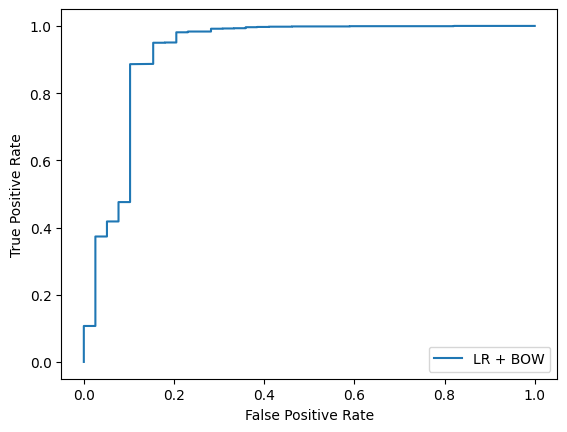

In [108]:
# AUC for LR + BOW
y_pred = clf_logr.predict_proba(X_test_cv)[:, 1]
auc_logr_bow = roc_auc_score(y_test, y_pred)
print("AUC for LR + BOW:", auc_logr_bow)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='LR + BOW')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC for LR + TFIDF: 0.9739504299443601


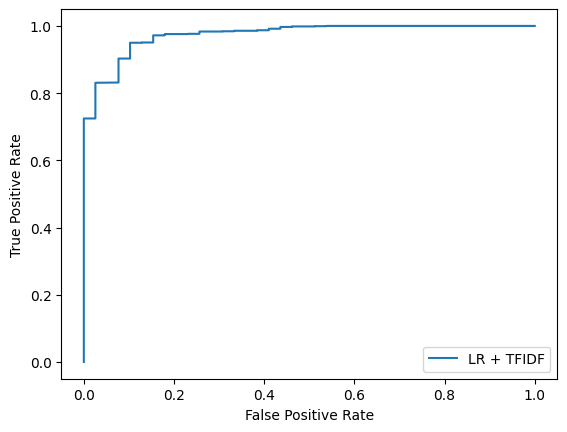

In [109]:
#AUC for LR + TFIDF
y_pred = clf_logr_tfidf.predict_proba(X_test_tfidf)[:, 1]
auc_logr_tfidf = roc_auc_score(y_test, y_pred)
print("AUC for LR + TFIDF:", auc_logr_tfidf)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='LR + TFIDF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC for LR + BOW + SMOTE: 0.6408894595541029


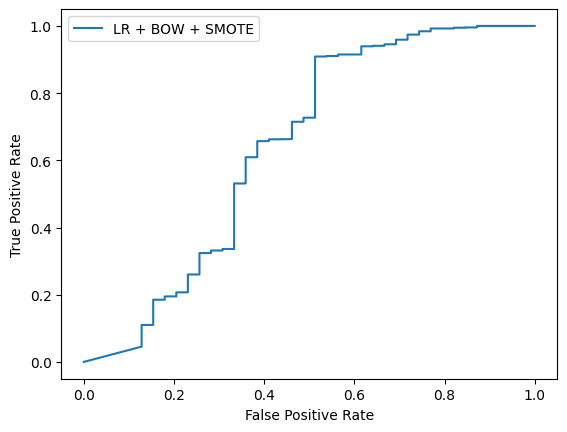

In [110]:
# AUC for LR + BOW + SMOTE
y_pred = clf_logr_resampled.predict_proba(X_test_cv)[:, 1]
auc_logr_bow_smote = roc_auc_score(y_test, y_pred)
print("AUC for LR + BOW + SMOTE:", auc_logr_bow_smote)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='LR + BOW + SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC for LR + TFIDF + SMOTE: 0.9745924283101824


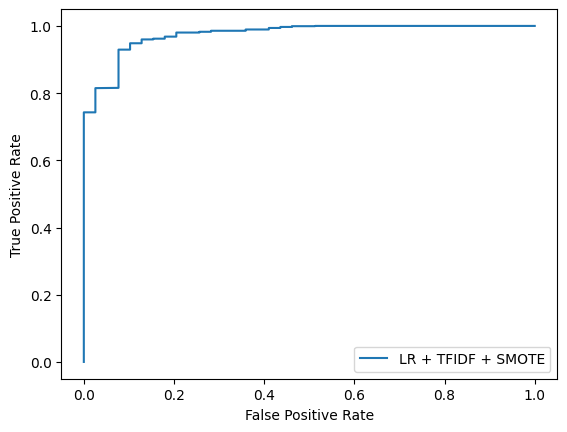

In [111]:
#AUC for LR + TFIDF + SMOTE
y_pred = clf_logr_tfidf_resampled.predict_proba(X_test_tfidf)[:, 1]
auc_logr_tfidf_smote = roc_auc_score(y_test, y_pred)
print("AUC for LR + TFIDF + SMOTE:", auc_logr_tfidf_smote)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='LR + TFIDF + SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

##### ROC_AUC for DT

AUC for DT + BOW: 0.7639196918407845


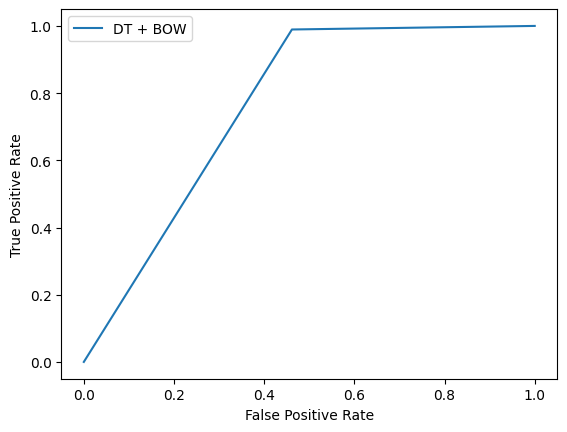

In [100]:
# AUC for DT + BOW
y_pred = clf_dt.predict_proba(X_test_cv)[:, 1]
auc_dt_bow = roc_auc_score(y_test, y_pred)
print("AUC for DT + BOW:", auc_dt_bow)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='DT + BOW')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC for DT + TFIDF: 0.7484436403252792


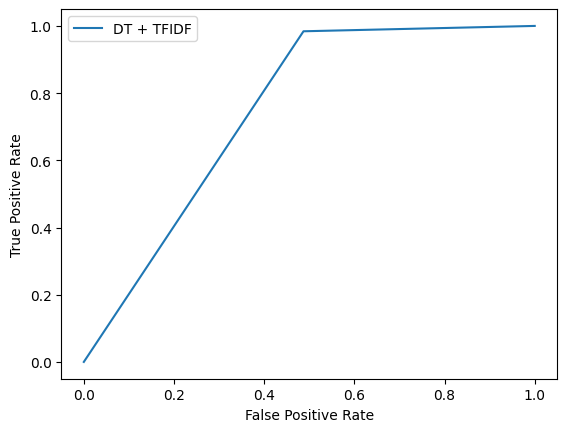

In [101]:
#AUC for DT + TFIDF
y_pred = clf_dt_tfidf.predict_proba(X_test_tfidf)[:, 1]
auc_dt_tfidf = roc_auc_score(y_test, y_pred)
print("AUC for DT + TFIDF:", auc_dt_tfidf)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='DT + TFIDF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC for DT + BOW + SMOTE: 0.7060328391891366


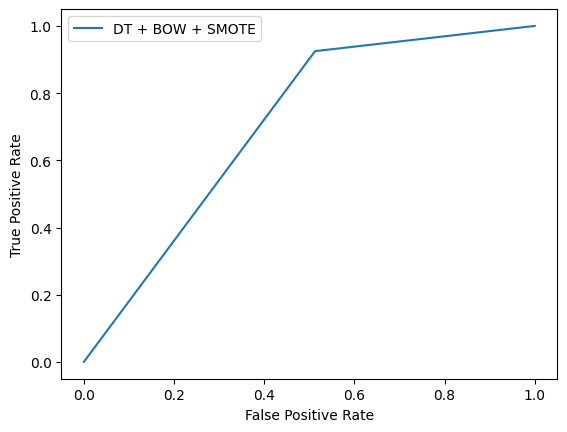

In [102]:
# AUC for DT + BOW + SMOTE
y_pred = clf_dt_resampled.predict_proba(X_test_cv)[:, 1]
auc_dt_bow_smote = roc_auc_score(y_test, y_pred)
print("AUC for DT + BOW + SMOTE:", auc_dt_bow_smote)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='DT + BOW + SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC for DT + TFIDF + SMOTE: 0.7272771487490759


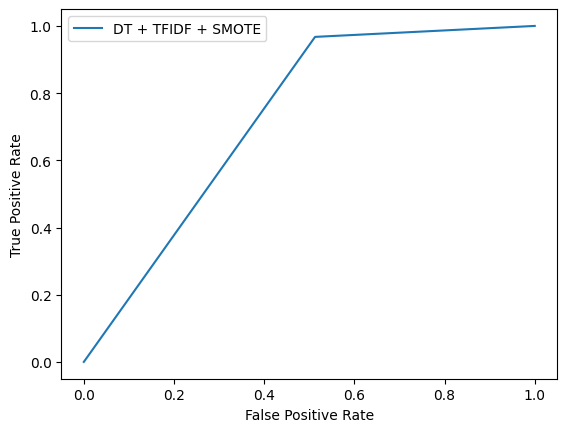

In [103]:
#AUC for DT + TFIDF + SMOTE
y_pred = clf_dt_tfidf_resampled.predict_proba(X_test_tfidf)[:, 1]
auc_dt_tfidf_smote = roc_auc_score(y_test, y_pred)
print("AUC for DT + TFIDF + SMOTE:", auc_dt_tfidf_smote)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='DT + TFIDF + SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

##### ROC_AUC for NB

AUC for NB + BOW: 0.5779055289677445


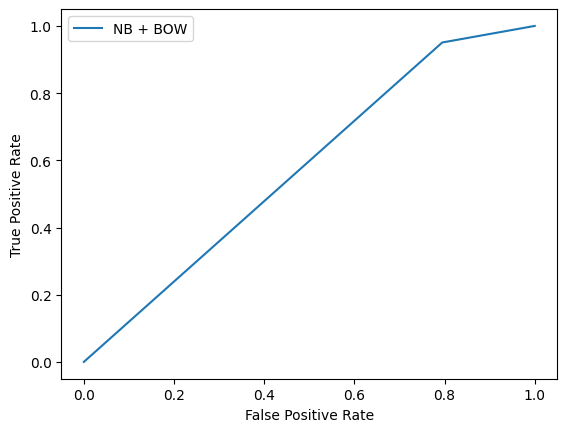

In [104]:
# AUC for NB + BOW
y_pred = clf_gnb.predict_proba(X_test_cv.toarray())[:, 1]
auc_gnb_bow = roc_auc_score(y_test, y_pred)
print("AUC for NB + BOW:", auc_gnb_bow)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='NB + BOW')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC for NB + TFIDF: 0.5911054044589704


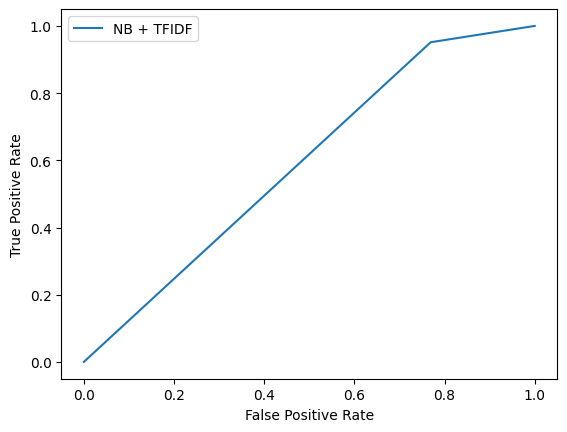

In [105]:
#AUC for NB + TFIDF
y_pred = clf_gnb_tfidf.predict_proba(X_test_tfidf.toarray())[:, 1]
auc_gnb_tfidf = roc_auc_score(y_test, y_pred)
print("AUC for NB + TFIDF:", auc_gnb_tfidf)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='NB + TFIDF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC for NB + BOW + SMOTE: 0.5779055289677445


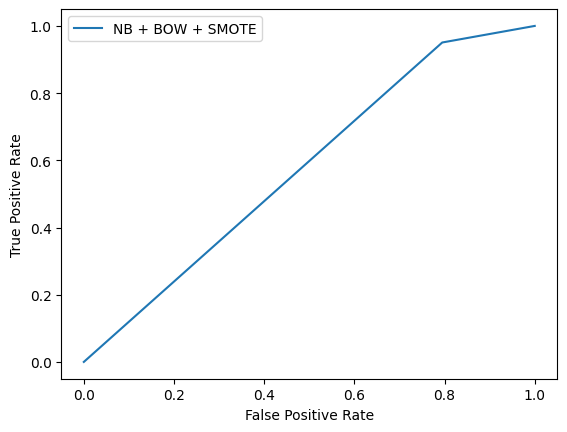

In [106]:
# AUC for NB + BOW + SMOTE
y_pred = clf_gnb_resampled.predict_proba(X_test_cv.toarray())[:, 1]
auc_gnb_bow_smote = roc_auc_score(y_test, y_pred)
print("AUC for NB + BOW + SMOTE:", auc_gnb_bow_smote)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='NB + BOW + SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC for NB + TFIDF + SMOTE: 0.5926228551418233


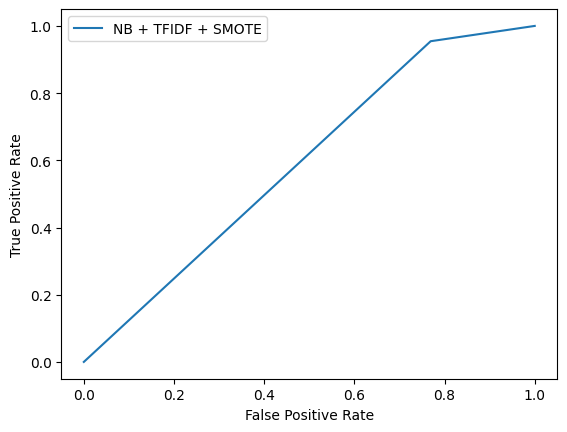

In [107]:
#AUC for NB + TFIDF + SMOTE
y_pred = clf_gnb_tfidf_resampled.predict_proba(X_test_tfidf.toarray())[:, 1]
auc_gnb_tfidf_smote = roc_auc_score(y_test, y_pred)
print("AUC for NB + TFIDF + SMOTE:", auc_gnb_tfidf_smote)

#plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='NOT_GENDER_RELATED')
plt.plot(fpr, tpr, label='NB + TFIDF + SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()